# Importing the Packages

In [ ]:
import numpy as np
import pandas as pd

/home/user/anaconda3/envs/test/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


# Data Exploration

In [2]:
data = pd.read_csv("dataframe_hrv.csv")

In [3]:
data.head()

,ECG,EMG,HR,RESP,Seconds,footGSR,handGSR,interval in seconds,marker,newtime,...,AVNN,SDNN,RMSSD,pNN50,TP,ULF,VLF,LF,HF,LF_HF
0,-0.001974,-0.004737,77.815789,10.801842,12.529684,2.417132,10.889447,0.614632,NaN,12.529684,...,0.617297,3.558630e-02,0.015203,0.055556,0.001238,0.0,0.000696,0.000407,0.000135,3.00200
1,0.002935,-0.004457,101.978261,10.750609,30.503500,2.417109,11.251065,0.647826,NaN,30.503500,...,0.647889,1.354660e-02,0.013858,0.045455,0.000144,0.0,0.000009,0.000060,0.000075,0.79371
2,0.006745,-0.003426,104.957447,10.557234,52.523021,2.226872,11.379638,0.646383,NaN,52.523021,...,0.645000,2.240000e-08,0.000000,0.000000,NaN,0.0,NaN,NaN,NaN,NaN
3,-0.004043,-0.002532,87.702128,10.640128,74.402170,2.173021,11.470830,0.645000,NaN,74.402170,...,0.645000,2.240000e-08,0.000000,0.000000,NaN,0.0,NaN,NaN,NaN,NaN
4,0.012745,-0.004426,88.829787,10.699319,96.219617,2.017106,11.135255,0.645000,NaN,96.219617,...,0.645000,2.240000e-08,0.000000,0.000000,NaN,0.0,NaN,NaN,NaN,NaN


# Data Processing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4129 entries, 0 to 4128
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ECG                  4129 non-null   float64
 1   EMG                  4023 non-null   float64
 2   HR                   4129 non-null   float64
 3   RESP                 4129 non-null   float64
 4   Seconds              4129 non-null   float64
 5   footGSR              4129 non-null   float64
 6   handGSR              4056 non-null   float64
 7   interval in seconds  4129 non-null   float64
 8   marker               3722 non-null   float64
 9   newtime              4129 non-null   float64
 10  stress               4129 non-null   float64
 11  time                 4129 non-null   float64
 12  NNRR                 4129 non-null   float64
 13  AVNN                 4129 non-null   float64
 14  SDNN                 4007 non-null   float64
 15  RMSSD                4129 non-null   f

In [5]:
missing_data = data.isnull().sum()
print(missing_data)

ECG                       0
EMG                     106
HR                        0
RESP                      0
Seconds                   0
footGSR                   0
handGSR                  73
interval in seconds       0
marker                  407
newtime                   0
stress                    0
time                      0
NNRR                      0
AVNN                      0
SDNN                    122
RMSSD                     0
pNN50                     0
TP                      299
ULF                     172
VLF                     127
LF                      127
HF                      127
LF_HF                  4071
dtype: int64


In [6]:
objList = data.columns
print(objList)

Index(['ECG', 'EMG', 'HR', 'RESP', 'Seconds', 'footGSR', 'handGSR',
       'interval in seconds', 'marker', 'newtime', 'stress', 'time', 'NNRR',
       'AVNN', 'SDNN', 'RMSSD', 'pNN50', 'TP', 'ULF', 'VLF', 'LF', 'HF',
       'LF_HF'],
      dtype='object')


In [7]:
data = data.drop(['marker','SDNN','TP', 'ULF', 'VLF', 'LF', 'HF','LF_HF'], axis=1, errors='ignore')

In [8]:
missing_data = data.isnull().sum()
print(missing_data)

ECG                      0
EMG                    106
HR                       0
RESP                     0
Seconds                  0
footGSR                  0
handGSR                 73
interval in seconds      0
newtime                  0
stress                   0
time                     0
NNRR                     0
AVNN                     0
RMSSD                    0
pNN50                    0
dtype: int64


In [9]:
df = pd.DataFrame(data)
    
df

,ECG,EMG,HR,RESP,Seconds,footGSR,handGSR,interval in seconds,newtime,stress,time,NNRR,AVNN,RMSSD,pNN50
0,-0.001974,-0.004737,77.815789,10.801842,12.529684,2.417132,10.889447,0.614632,12.529684,0.000000,12.529684,0.973684,0.617297,0.015203,0.055556
1,0.002935,-0.004457,101.978261,10.750609,30.503500,2.417109,11.251065,0.647826,30.503500,0.000000,30.503500,0.978261,0.647889,0.013858,0.045455
2,0.006745,-0.003426,104.957447,10.557234,52.523021,2.226872,11.379638,0.646383,52.523021,0.000000,52.523021,0.978723,0.645000,0.000000,0.000000
3,-0.004043,-0.002532,87.702128,10.640128,74.402170,2.173021,11.470830,0.645000,74.402170,0.000000,74.402170,0.978723,0.645000,0.000000,0.000000
4,0.012745,-0.004426,88.829787,10.699319,96.219617,2.017106,11.135255,0.645000,96.219617,0.000000,96.219617,0.978723,0.645000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4124,0.235263,0.424921,67.263158,33.493789,1384.599395,1.352105,5.373237,0.870763,69562.420500,0.131579,1384.599395,0.973684,0.869892,0.045648,0.083333
4125,0.266158,0.438684,69.500000,33.406211,1405.522816,1.361316,5.372211,0.877605,69583.343920,0.131579,1405.522816,0.973684,0.876919,0.032167,0.027778
4126,0.199139,0.411472,68.972222,33.246056,1423.220333,1.417806,5.706972,0.912306,69027.154060,0.138889,1423.220333,0.972222,0.912571,0.045629,0.058824
4127,0.247811,0.423108,67.189189,33.370378,1443.257216,1.370865,5.494568,0.908541,69341.889860,0.135135,1443.257216,0.972973,0.906889,0.044973,0.057143


In [10]:
df = df.dropna(how = 'any')

In [11]:
missing_data = df.isnull().sum()
print(missing_data)

ECG                    0
EMG                    0
HR                     0
RESP                   0
Seconds                0
footGSR                0
handGSR                0
interval in seconds    0
newtime                0
stress                 0
time                   0
NNRR                   0
AVNN                   0
RMSSD                  0
pNN50                  0
dtype: int64


In [12]:
df.head()

,ECG,EMG,HR,RESP,Seconds,footGSR,handGSR,interval in seconds,newtime,stress,time,NNRR,AVNN,RMSSD,pNN50
0,-0.001974,-0.004737,77.815789,10.801842,12.529684,2.417132,10.889447,0.614632,12.529684,0.0,12.529684,0.973684,0.617297,0.015203,0.055556
1,0.002935,-0.004457,101.978261,10.750609,30.503500,2.417109,11.251065,0.647826,30.503500,0.0,30.503500,0.978261,0.647889,0.013858,0.045455
2,0.006745,-0.003426,104.957447,10.557234,52.523021,2.226872,11.379638,0.646383,52.523021,0.0,52.523021,0.978723,0.645000,0.000000,0.000000
3,-0.004043,-0.002532,87.702128,10.640128,74.402170,2.173021,11.470830,0.645000,74.402170,0.0,74.402170,0.978723,0.645000,0.000000,0.000000
4,0.012745,-0.004426,88.829787,10.699319,96.219617,2.017106,11.135255,0.645000,96.219617,0.0,96.219617,0.978723,0.645000,0.000000,0.000000


In [36]:
df.tail()

,ECG,EMG,HR,RESP,Seconds,footGSR,handGSR,interval in seconds,newtime,stress,time,NNRR,AVNN,RMSSD,pNN50
4124,0.235263,0.424921,67.263158,33.493789,1384.599395,1.352105,5.373237,0.870763,69562.42050,0,1384.599395,0.973684,0.869892,0.045648,0.083333
4125,0.266158,0.438684,69.500000,33.406211,1405.522816,1.361316,5.372211,0.877605,69583.34392,0,1405.522816,0.973684,0.876919,0.032167,0.027778
4126,0.199139,0.411472,68.972222,33.246056,1423.220333,1.417806,5.706972,0.912306,69027.15406,0,1423.220333,0.972222,0.912571,0.045629,0.058824
4127,0.247811,0.423108,67.189189,33.370378,1443.257216,1.370865,5.494568,0.908541,69341.88986,0,1443.257216,0.972973,0.906889,0.044973,0.057143
4128,0.259590,0.438462,65.410256,33.468256,1466.115769,1.357769,5.366410,0.842026,69908.80797,0,1466.115769,0.974359,0.838711,0.025974,0.081081


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3952 entries, 0 to 4128
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ECG                  3952 non-null   float64
 1   EMG                  3952 non-null   float64
 2   HR                   3952 non-null   float64
 3   RESP                 3952 non-null   float64
 4   Seconds              3952 non-null   float64
 5   footGSR              3952 non-null   float64
 6   handGSR              3952 non-null   float64
 7   interval in seconds  3952 non-null   float64
 8   newtime              3952 non-null   float64
 9   stress               3952 non-null   float64
 10  time                 3952 non-null   float64
 11  NNRR                 3952 non-null   float64
 12  AVNN                 3952 non-null   float64
 13  RMSSD                3952 non-null   float64
 14  pNN50                3952 non-null   float64
dtypes: float64(15)
memory usage: 494.0 KB


In [16]:
df.stress = df.stress.astype(int)

/home/user/anaconda3/envs/test/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
df['stress'].value_counts()

0    2942
1    1010
Name: stress, dtype: int64

# Visualization - EDA

<AxesSubplot:xlabel='stress', ylabel='count'>

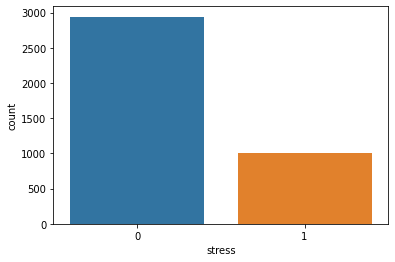

In [18]:
import seaborn as sns
sns.countplot(x="stress", data = df)

<AxesSubplot:>

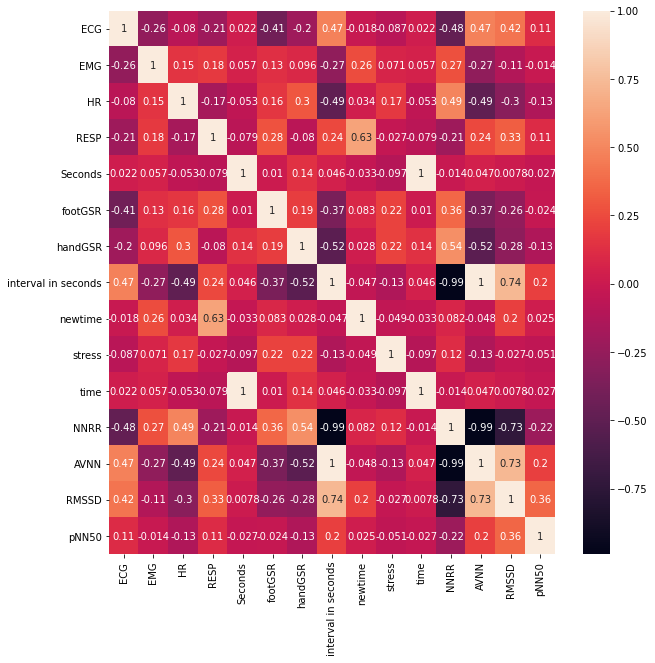

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

# Feature Selection

In [21]:
X = df.drop(['stress'],axis=1)
y = df['stress']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3161, 14) (3161,)
Test set: (791, 14) (791,)


# Machine Learning

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)

In [25]:
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for RF: 
[[542  35]
 [ 54 160]]


In [28]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val1 = accuracy_score(y_test, predictions) *100 
print(val1)
from sklearn import metrics
RF_sensitivity = ((TP / float(FN + TP)))* 100

print(RF_sensitivity)
RF_specificity = ((TN / (TN + FP))) * 100

print(RF_specificity)

0.1125158027812895
88.74841972187106
74.76635514018692
93.93414211438474


# Voting Classifier

In [29]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = SVC(gamma='auto')
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for Voting Classifier: 
[[551  26]
 [ 75 139]]


In [30]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val3 = accuracy_score(y_test, predictions)* 100
print(val3)
from sklearn import metrics
VOT_sensitivity = ((TP / float(FN + TP))) * 100

print(VOT_sensitivity)
VOT_specificity = ((TN / (TN + FP))) * 100

print(VOT_specificity)

0.1276864728192162
87.23135271807838
64.95327102803739
95.49393414211438


# KNeighborsClassifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
predictions = neigh.predict(X_test)
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val2 = accuracy_score(y_test, predictions) *100 
print(val2)
from sklearn import metrics
KNN_sensitivity = ((TP / float(FN + TP)))* 100

print(KNN_sensitivity)
KNN_specificity = ((TN / (TN + FP))) * 100

print(KNN_specificity)

*Confusion Matrix for KNN: 
[[541  36]
 [ 44 170]]
0.1011378002528445
89.88621997471556
79.43925233644859
93.76083188908146


# Accuracy Comparison

In [33]:
score = [val1,val2,val3]

In [34]:
#make variabel for save the result and to show it
classifier = ('Random Forest','Voting Classifier','KNN')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2]
[88.74841972187106, 89.88621997471556, 87.23135271807838]


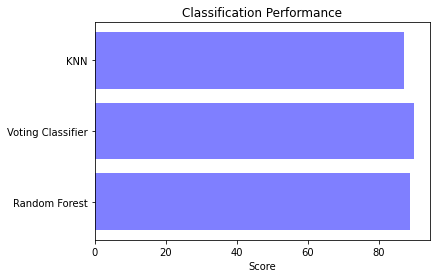

In [35]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()